Figura 2: grafico descrittivo dell'output di rMATS per ogni confronto. Quindi far vedere totale eventi sign e loro proporzioni (mettere a confronto i due comparisons?).
Mettere in risalto (forse conviene un grafico a parte) gli 85 ASEs condivisi e il loro deltaPSI (far capire che sono tutti opposti).

In [1]:
import pandas as pd

In [2]:
common_sig='common_SIG-splicing_events.txt'
bAmy_sig='splicing_events_bAmy_VS_CTR.txt'
CBNR20_sig='splicing_events_CBNR20-bAmy-vs-bAmy.txt'
common_not_sig='common_NOT-SIG-splicing_events.txt'
bAmy_not_sig='NOT-SIG-splicing_events_bAmy_VS_CTR.txt'
CBNR20_not_sig='NOT-SIG-splicing_events_CBNR20-bAmy-vs-bAmy.txt'

In [3]:
!ls common*txt

common_NOT-SIG-splicing_events.txt  common_SIG-splicing_events.txt


In [4]:
events=['A3SS','A5SS','SE','MXE','RI']
significance=['NS','S']
comparisons=['bAmy','COMMON','CBNR20']
stats_events= pd.DataFrame()

In [5]:
def getASE(significance,comparison,EV):
    D={('NS','CBNR20'): CBNR20_not_sig,('NS','bAmy'):bAmy_not_sig ,('S','bAmy'):bAmy_sig,('S','CBNR20'):CBNR20_sig,('NS','COMMON'): common_not_sig,('S','COMMON'): common_sig}
    file=D[(significance,comparison)]
    df=pd.read_csv(file,sep='\t')
    df=df[df['Class']==EV]
    # Extract unique rows based on the first 13 columns
    unique_rows = df.iloc[:, :13].drop_duplicates()
    # If you want to keep the entire DataFrame but ensure uniqueness based on the first 13 columns:
    unique_rows_df = df.drop_duplicates(subset=df.columns[:13])
    return unique_rows_df.shape[0]
def getGenes(significance,comparison,EV):
    D={('NS','CBNR20'): CBNR20_not_sig,('NS','bAmy'):bAmy_not_sig ,('S','bAmy'):bAmy_sig,('S','CBNR20'):CBNR20_sig,('NS','COMMON'): common_not_sig,('S','COMMON'): common_sig}
    file=D[(significance,comparison)]
    df=pd.read_csv(file,sep='\t')
    df=df[df['Class']==EV]
    ngenes=len(df['GeneID'].unique())
    return ngenes

In [6]:
for e in events:
    for s in significance:
        for c in comparisons:
            col_name=s+'-'+c
            index=e
            n=getASE(s,c,e)
            stats_events.at[index,col_name]=n

In [7]:
stats_events.index.name = 'ASE'

In [8]:
stats_events.index.name

'ASE'

In [9]:
stats_events

,NS-bAmy,NS-COMMON,NS-CBNR20,S-bAmy,S-COMMON,S-CBNR20
ASE,,,,,,
A3SS,12083.0,8725.0,11136.0,76.0,12.0,72.0
A5SS,7795.0,5609.0,7177.0,32.0,7.0,53.0
SE,29811.0,21672.0,27353.0,265.0,58.0,285.0
MXE,3903.0,2634.0,3468.0,52.0,4.0,47.0
RI,6943.0,5610.0,6583.0,87.0,15.0,71.0


In [10]:
stats_events['Not_Significant-bAmy_vs_CTR']=stats_events['NS-bAmy']-stats_events['NS-COMMON']
stats_events['Not_Significant-CBNR20_vs_bAmy']=stats_events['NS-CBNR20']-stats_events['NS-COMMON']
stats_events['Not_Significant-Common']=stats_events['NS-COMMON']
stats_events['Not_Significant-Total']=stats_events['NS-bAmy']+stats_events['NS-CBNR20']-stats_events['NS-COMMON']
stats_events['A'+r'$\beta$'+'   vs    CTR']=stats_events['S-bAmy']-stats_events['S-COMMON']
stats_events['CBNR20+'+'A'+r'$\beta$'+'   vs   '+'A'+r'$\beta$']=stats_events['S-CBNR20']-stats_events['S-COMMON']
stats_events['Shared']=stats_events['S-COMMON']
stats_events['Significant-Total']=stats_events['S-bAmy']+stats_events['S-CBNR20']-stats_events['S-COMMON']

In [11]:
#ns_stats_events=stats_events[stats_events.columns[:4]].reset_index()
s_stats_events=stats_events[stats_events.columns[10:-1]].reset_index()

In [12]:
s_stats_events

,ASE,A$\beta$ vs CTR,CBNR20+A$\beta$ vs A$\beta$,Shared
0,A3SS,64.0,60.0,12.0
1,A5SS,25.0,46.0,7.0
2,SE,207.0,227.0,58.0
3,MXE,48.0,43.0,4.0
4,RI,72.0,56.0,15.0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#ns_df_melted = pd.melt(ns_stats_events, id_vars=['ID'], var_name='Comparison', value_name='Count')
s_df_melted = pd.melt(s_stats_events, id_vars=['ASE'], var_name='Comparison', value_name='Count')
s_df_melted 

,ASE,Comparison,Count
0,A3SS,A$\beta$ vs CTR,64.0
1,A5SS,A$\beta$ vs CTR,25.0
2,SE,A$\beta$ vs CTR,207.0
3,MXE,A$\beta$ vs CTR,48.0
4,RI,A$\beta$ vs CTR,72.0
5,A3SS,CBNR20+A$\beta$ vs A$\beta$,60.0
6,A5SS,CBNR20+A$\beta$ vs A$\beta$,46.0
7,SE,CBNR20+A$\beta$ vs A$\beta$,227.0
8,MXE,CBNR20+A$\beta$ vs A$\beta$,43.0
9,RI,CBNR20+A$\beta$ vs A$\beta$,56.0


In [15]:
shared_psi=pd.DataFrame()

In [16]:
df = pd.read_csv(common_sig, sep='\t')
df

,Class,GeneID,geneSymbol,chr,strand,coho1,coho2,coho3,coho4,coho5,...,coho8,FDR_bAmy_VS_CTR,IncLevel1_bAmy_VS_CTR,IncLevel2_bAmy_VS_CTR,IncLevelDifference_bAmy_VS_CTR,DE-NOVO,FDR_CBNR20-bAmy-VS-bAmy,IncLevel1_CBNR20-bAmy-VS-bAmy,IncLevel2_CBNR20-bAmy-VS-bAmy,IncLevelDifference_CBNR20-bAmy-VS-bAmy
0,MXE,ENSG00000163913,IFT122,chr3,+,129492140,129492194,129495445,129495607,129488256,...,129500068.0,0.024288,"0.075,0.151","0.556,0.354",-0.342,False,0.021829,"0.422,0.467","0.075,0.151",0.332
1,MXE,ENSG00000109339,MAPK10,chr4,-,86194308,86194335,86194335,86194407,86159297,...,86354644.0,0.012367,"0.761,0.781","1.0,1.0",-0.229,False,0.014000,"1.0,1.0","0.761,0.781",0.229
2,MXE,ENSG00000046651,OFD1,chrX,+,13751248,13751368,13753367,13753441,13749426,...,13755242.0,0.034452,"0.545,0.685","0.121,0.356",0.377,False,0.025614,"0.28,0.283","0.545,0.685",-0.334
3,MXE,ENSG00000215126,ZNG1F,chr9,-,41170283,41170423,41171846,41171934,41166783,...,41172749.0,0.008230,"0.959,0.71","1.0,1.0",-0.165,False,0.007369,"1.0,1.0","0.959,0.71",0.165
4,A5SS,ENSG00000160229,ZNF66,chr19,+,20776303,20776481,20776303,20776450,20792511,...,NaN,0.047144,"0.148,0.0","0.391,0.28",-0.262,False,0.002582,"0.553,0.375","0.148,0.0",0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,SE,ENSG00000119684,MLH3,chr14,-,75039910,75040024,75038339,75038412,75041614,...,NaN,0.000219,"1.0,1.0","0.75,0.515",0.367,False,0.003848,"0.628,0.756","1.0,1.0",-0.308
92,SE,ENSG00000155229,MMS19,chr10,-,97468965,97469126,97468251,97468406,97469645,...,NaN,0.000109,"0.667,0.511","1.0,1.0",-0.411,True,0.020245,"0.833,1.0","0.667,0.511",0.328
93,SE,ENSG00000185104,FAF1,chr1,-,50583651,50583709,50582617,50582699,50584684,...,NaN,0.020420,"1.0,1.0","1.0,0.747",0.127,True,0.025711,"0.843,0.798","1.0,1.0",-0.179
94,SE,ENSG00000165392,WRN,chr8,+,31090464,31090536,31088889,31088965,31090833,...,NaN,0.031056,"1.0,0.615","1.0,1.0",-0.193,True,0.023385,"1.0,1.0","1.0,0.615",0.193


In [17]:
df.columns #'IncLevel1_CBNR20-bAmy-VS-bAmy','IncLevel1_bAmy_VS_CTR','IncLevel2_bAmy_VS_CTR'

Index(['Class', 'GeneID', 'geneSymbol', 'chr', 'strand', 'coho1', 'coho2',
       'coho3', 'coho4', 'coho5', 'coho6', 'coho7', 'coho8', 'FDR_bAmy_VS_CTR',
       'IncLevel1_bAmy_VS_CTR', 'IncLevel2_bAmy_VS_CTR',
       'IncLevelDifference_bAmy_VS_CTR', 'DE-NOVO', 'FDR_CBNR20-bAmy-VS-bAmy',
       'IncLevel1_CBNR20-bAmy-VS-bAmy', 'IncLevel2_CBNR20-bAmy-VS-bAmy',
       'IncLevelDifference_CBNR20-bAmy-VS-bAmy'],
      dtype='object')

In [18]:
df = pd.read_csv(common_sig, sep='\t')
df['geneSymbol'].fillna(df['GeneID'], inplace=True)
#print(df.columns)
col = ['Class', 'geneSymbol', 'IncLevelDifference_CBNR20-bAmy-VS-bAmy', 'IncLevelDifference_bAmy_VS_CTR','DE-NOVO']
shared_psi = df[col]
shared_psi

/tmp/ipykernel_24859/2755782122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['geneSymbol'].fillna(df['GeneID'], inplace=True)


,Class,geneSymbol,IncLevelDifference_CBNR20-bAmy-VS-bAmy,IncLevelDifference_bAmy_VS_CTR,DE-NOVO
0,MXE,IFT122,0.332,-0.342,False
1,MXE,MAPK10,0.229,-0.229,False
2,MXE,OFD1,-0.334,0.377,False
3,MXE,ZNG1F,0.165,-0.165,False
4,A5SS,ZNF66,0.390,-0.262,False
...,...,...,...,...,...
91,SE,MLH3,-0.308,0.367,False
92,SE,MMS19,0.328,-0.411,True
93,SE,FAF1,-0.179,0.127,True
94,SE,WRN,0.193,-0.193,True


In [19]:
# Create rows for each comparison type
df_long = pd.melt(shared_psi,
                   id_vars=['Class', 'geneSymbol','DE-NOVO'],
                   value_vars=['IncLevelDifference_CBNR20-bAmy-VS-bAmy', 'IncLevelDifference_bAmy_VS_CTR'],
                   var_name='comparison',
                   value_name='psi level')

# Rename the 'comparison' column to match the desired output
df_long['comparison'] = df_long['comparison'].replace({
    'IncLevelDifference_CBNR20-bAmy-VS-bAmy': 'CBNR20-bAmy_VS_bAMY',
    'IncLevelDifference_bAmy_VS_CTR': 'bAmy_VS_CTR'
})

df_long.Class.unique()
df_long.rename(columns={'Class': 'ASE'}, inplace=True)

In [20]:
df_long

,ASE,geneSymbol,DE-NOVO,comparison,psi level
0,MXE,IFT122,False,CBNR20-bAmy_VS_bAMY,0.332
1,MXE,MAPK10,False,CBNR20-bAmy_VS_bAMY,0.229
2,MXE,OFD1,False,CBNR20-bAmy_VS_bAMY,-0.334
3,MXE,ZNG1F,False,CBNR20-bAmy_VS_bAMY,0.165
4,A5SS,ZNF66,False,CBNR20-bAmy_VS_bAMY,0.390
...,...,...,...,...,...
187,SE,MLH3,False,bAmy_VS_CTR,0.367
188,SE,MMS19,True,bAmy_VS_CTR,-0.411
189,SE,FAF1,True,bAmy_VS_CTR,0.127
190,SE,WRN,True,bAmy_VS_CTR,-0.193


In [21]:
# Create a unique identifier for each row based on 'ASE', 'geneSymbol', and 'comparison'
df_long['unique_id'] = df_long.groupby(['ASE', 'geneSymbol', 'comparison','DE-NOVO']).cumcount() + 1

# Update 'geneSymbol' with numerical suffix
df_long['geneSymbol'] = df_long.apply(lambda row: f"{row['geneSymbol']}_{row['unique_id']}" if row['unique_id'] > 1 else row['geneSymbol'], axis=1)

# Drop the 'unique_id' column as it's no longer needed
df_long = df_long.drop(columns=['unique_id'])

df_long


,ASE,geneSymbol,DE-NOVO,comparison,psi level
0,MXE,IFT122,False,CBNR20-bAmy_VS_bAMY,0.332
1,MXE,MAPK10,False,CBNR20-bAmy_VS_bAMY,0.229
2,MXE,OFD1,False,CBNR20-bAmy_VS_bAMY,-0.334
3,MXE,ZNG1F,False,CBNR20-bAmy_VS_bAMY,0.165
4,A5SS,ZNF66,False,CBNR20-bAmy_VS_bAMY,0.390
...,...,...,...,...,...
187,SE,MLH3_2,False,bAmy_VS_CTR,0.367
188,SE,MMS19,True,bAmy_VS_CTR,-0.411
189,SE,FAF1,True,bAmy_VS_CTR,0.127
190,SE,WRN,True,bAmy_VS_CTR,-0.193


In [22]:
str1='A'+r'$\beta$'+'   vs    CTR'

str2='CBNR20+'+'A'+r'$\beta$'+'   vs   '+'A'+r'$\beta$'

D={'bAmy_VS_CTR':str1,'CBNR20-bAmy_VS_bAMY':str2}

In [23]:
df_long['comparison']=df_long['comparison'].map(D)

In [24]:
df_long

,ASE,geneSymbol,DE-NOVO,comparison,psi level
0,MXE,IFT122,False,CBNR20+A$\beta$ vs A$\beta$,0.332
1,MXE,MAPK10,False,CBNR20+A$\beta$ vs A$\beta$,0.229
2,MXE,OFD1,False,CBNR20+A$\beta$ vs A$\beta$,-0.334
3,MXE,ZNG1F,False,CBNR20+A$\beta$ vs A$\beta$,0.165
4,A5SS,ZNF66,False,CBNR20+A$\beta$ vs A$\beta$,0.390
...,...,...,...,...,...
187,SE,MLH3_2,False,A$\beta$ vs CTR,0.367
188,SE,MMS19,True,A$\beta$ vs CTR,-0.411
189,SE,FAF1,True,A$\beta$ vs CTR,0.127
190,SE,WRN,True,A$\beta$ vs CTR,-0.193


In [25]:
# Create a dictionary from the two columns
gene_dict = dict(zip(df_long['geneSymbol'], df_long['DE-NOVO']))

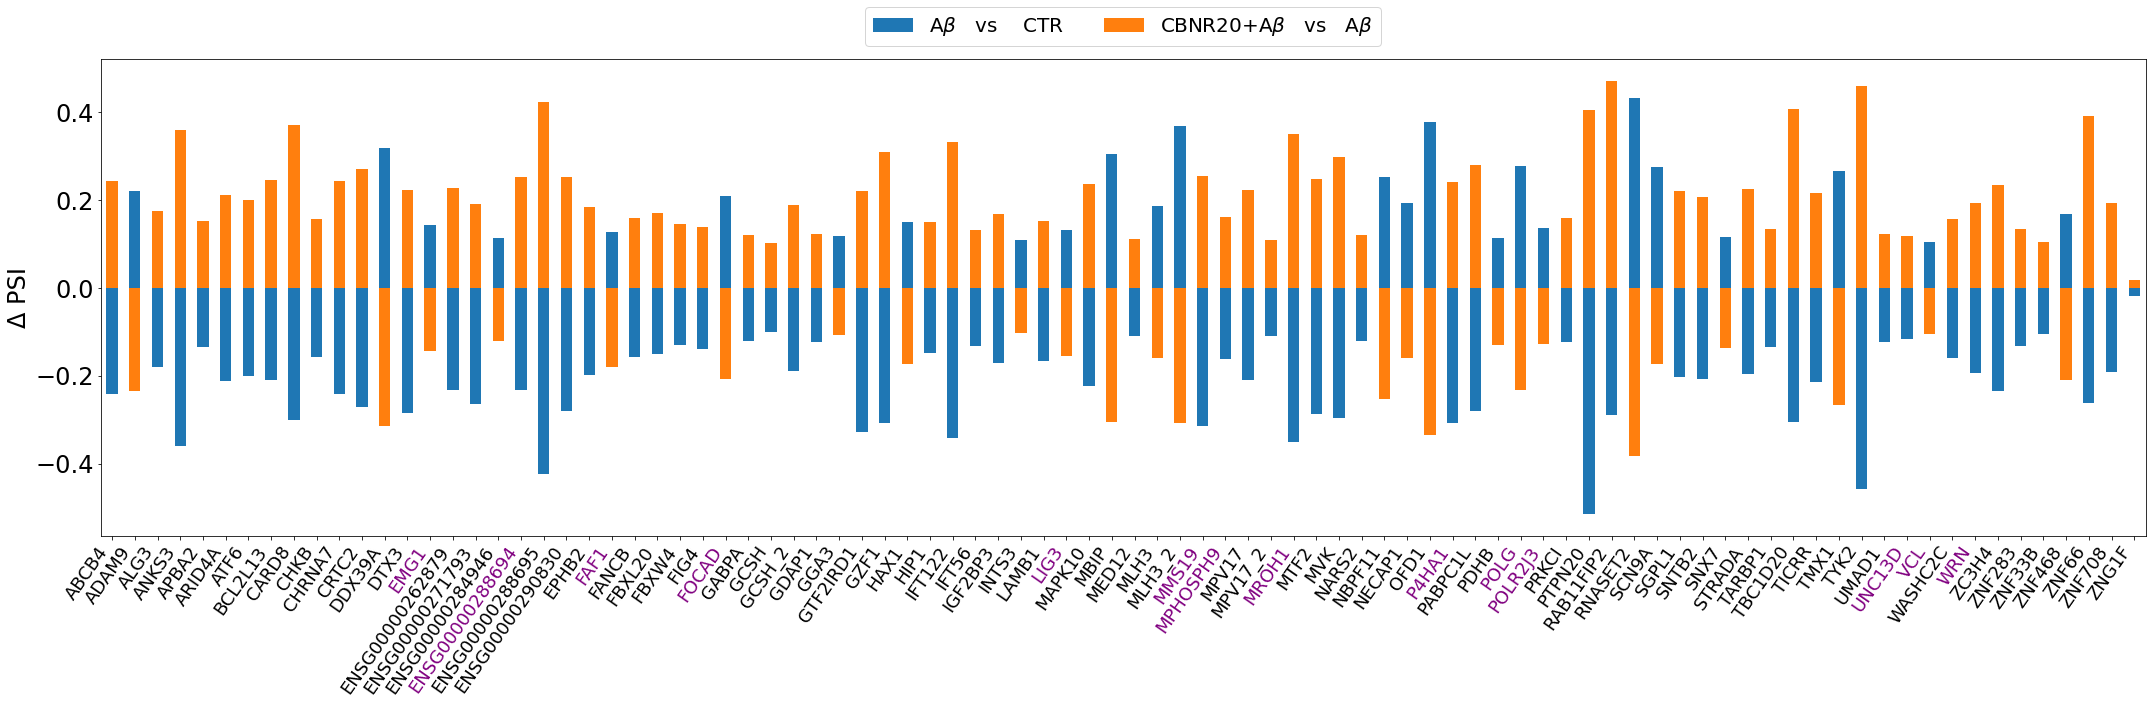

In [26]:
# Create the pivot table
pivot_df = df_long.pivot_table(index='geneSymbol', columns='comparison', values='psi level')

# Plot the pivot table
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(30, 10))  # Adjust figure size

# Adding titles and labels
#plt.title('ASE inclusion levels')
plt.ylabel('Δ PSI', fontsize=24)  # Increase font size of the y label
plt.xticks(rotation=55, ha='right')  # Rotate x labels

# Set the color of each xtick label based on True (red) or False (black) in gene_dict
xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()]
colors = ['purple' if gene_dict.get(gene, False) else 'black' for gene in xtick_labels]  # Default color is 'black' if not in dict

# Apply the colors and make labels bold
for tick, color in zip(ax.get_xticklabels(), colors):
    tick.set_color(color)
    #tick.set_fontweight('bold')  # Make the label bold
# Increase font size of y-tick labels
# Increase legend size and place it on the right
# Increase legend size and place it outside the plot at the upper center
ax.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3)  # Adjust position as needed
# Change 14 to your desired legend size
ax.tick_params(axis='y', labelsize=24)  # Change 14 to your desired size
# Increase font size of x-tick labels
ax.tick_params(axis='x', labelsize=18)  # Change 14 to your desired size
# Hide the x-axis label ('geneSymbol')
ax.set_xlabel('')  # Set x-axis label to empty string
plt.tight_layout()  # Adjust layout
plt.savefig('ASE_inclusion_levels.png', dpi=300)  # Save as PNG with 300 dpi
plt.show()


In [27]:
df = pd.read_csv(common_sig, sep='\t')
df['geneSymbol'].fillna(df['GeneID'], inplace=True)
#print(df.columns)
single_psi=['IncLevel1_CBNR20-bAmy-VS-bAmy','IncLevel1_bAmy_VS_CTR','IncLevel2_bAmy_VS_CTR']
col = ['Class', 'geneSymbol','DE-NOVO']+single_psi
shared_single_psi = df[col]
shared_single_psi.columns=['ASE', 'geneSymbol','DE-NOVO','CBNR20-bAmy','bAmy','CTR']
shared_single_psi

/tmp/ipykernel_24859/4235699901.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['geneSymbol'].fillna(df['GeneID'], inplace=True)


,ASE,geneSymbol,DE-NOVO,CBNR20-bAmy,bAmy,CTR
0,MXE,IFT122,False,"0.422,0.467","0.075,0.151","0.556,0.354"
1,MXE,MAPK10,False,"1.0,1.0","0.761,0.781","1.0,1.0"
2,MXE,OFD1,False,"0.28,0.283","0.545,0.685","0.121,0.356"
3,MXE,ZNG1F,False,"1.0,1.0","0.959,0.71","1.0,1.0"
4,A5SS,ZNF66,False,"0.553,0.375","0.148,0.0","0.391,0.28"
...,...,...,...,...,...,...
91,SE,MLH3,False,"0.628,0.756","1.0,1.0","0.75,0.515"
92,SE,MMS19,True,"0.833,1.0","0.667,0.511","1.0,1.0"
93,SE,FAF1,True,"0.843,0.798","1.0,1.0","1.0,0.747"
94,SE,WRN,True,"1.0,1.0","1.0,0.615","1.0,1.0"


In [28]:
def calculate_mean(value1, value2):
    return (float(value1) + float(value2)) / 2

def mean_of_two_comma_separated(values):
    # Split the comma-separated string into two parts
    #print(values)
    part1, part2 = values.split(',')
    # Calculate the mean of each part
    mean1 = calculate_mean(part1, part2)
    #print(part1, '>',part2,'>',mean1)
    return mean1

# Apply the mean calculation to each column containing comma-separated values
for column in ['CBNR20-bAmy', 'bAmy', 'CTR']:
    shared_single_psi[column] = shared_single_psi[column].apply(mean_of_two_comma_separated)


shared_single_psi.set_index('geneSymbol',inplace=True)

/tmp/ipykernel_24859/3446650707.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shared_single_psi[column] = shared_single_psi[column].apply(mean_of_two_comma_separated)


In [29]:
shared_single_psi

,ASE,DE-NOVO,CBNR20-bAmy,bAmy,CTR
geneSymbol,,,,,
IFT122,MXE,False,0.4445,0.1130,0.4550
MAPK10,MXE,False,1.0000,0.7710,1.0000
OFD1,MXE,False,0.2815,0.6150,0.2385
ZNG1F,MXE,False,1.0000,0.8345,1.0000
ZNF66,A5SS,False,0.4640,0.0740,0.3355
...,...,...,...,...,...
MLH3,SE,False,0.6920,1.0000,0.6325
MMS19,SE,True,0.9165,0.5890,1.0000
FAF1,SE,True,0.8205,1.0000,0.8735


In [30]:
shared_single_psi.sort_values(by='CTR', ascending=False,inplace=True)
shared_single_psi.drop('ASE',inplace=True,axis=1)

/tmp/ipykernel_24859/307522422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shared_single_psi.sort_values(by='CTR', ascending=False,inplace=True)
/tmp/ipykernel_24859/307522422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shared_single_psi.drop('ASE',inplace=True,axis=1)


In [31]:
shared_single_psi

,DE-NOVO,CBNR20-bAmy,bAmy,CTR
geneSymbol,,,,
CHKB,False,1.000,0.8495,1.0
FIG4,False,1.000,0.8605,1.0
DTX3,False,0.938,0.7165,1.0
ATF6,False,1.000,0.8000,1.0
TARBP1,False,1.000,0.8645,1.0
...,...,...,...,...
FOCAD,True,0.000,0.2085,0.0
TMX1,False,0.000,0.2660,0.0
MBIP,False,0.000,0.3055,0.0


In [32]:
from scipy.interpolate import make_interp_spline
import numpy as np

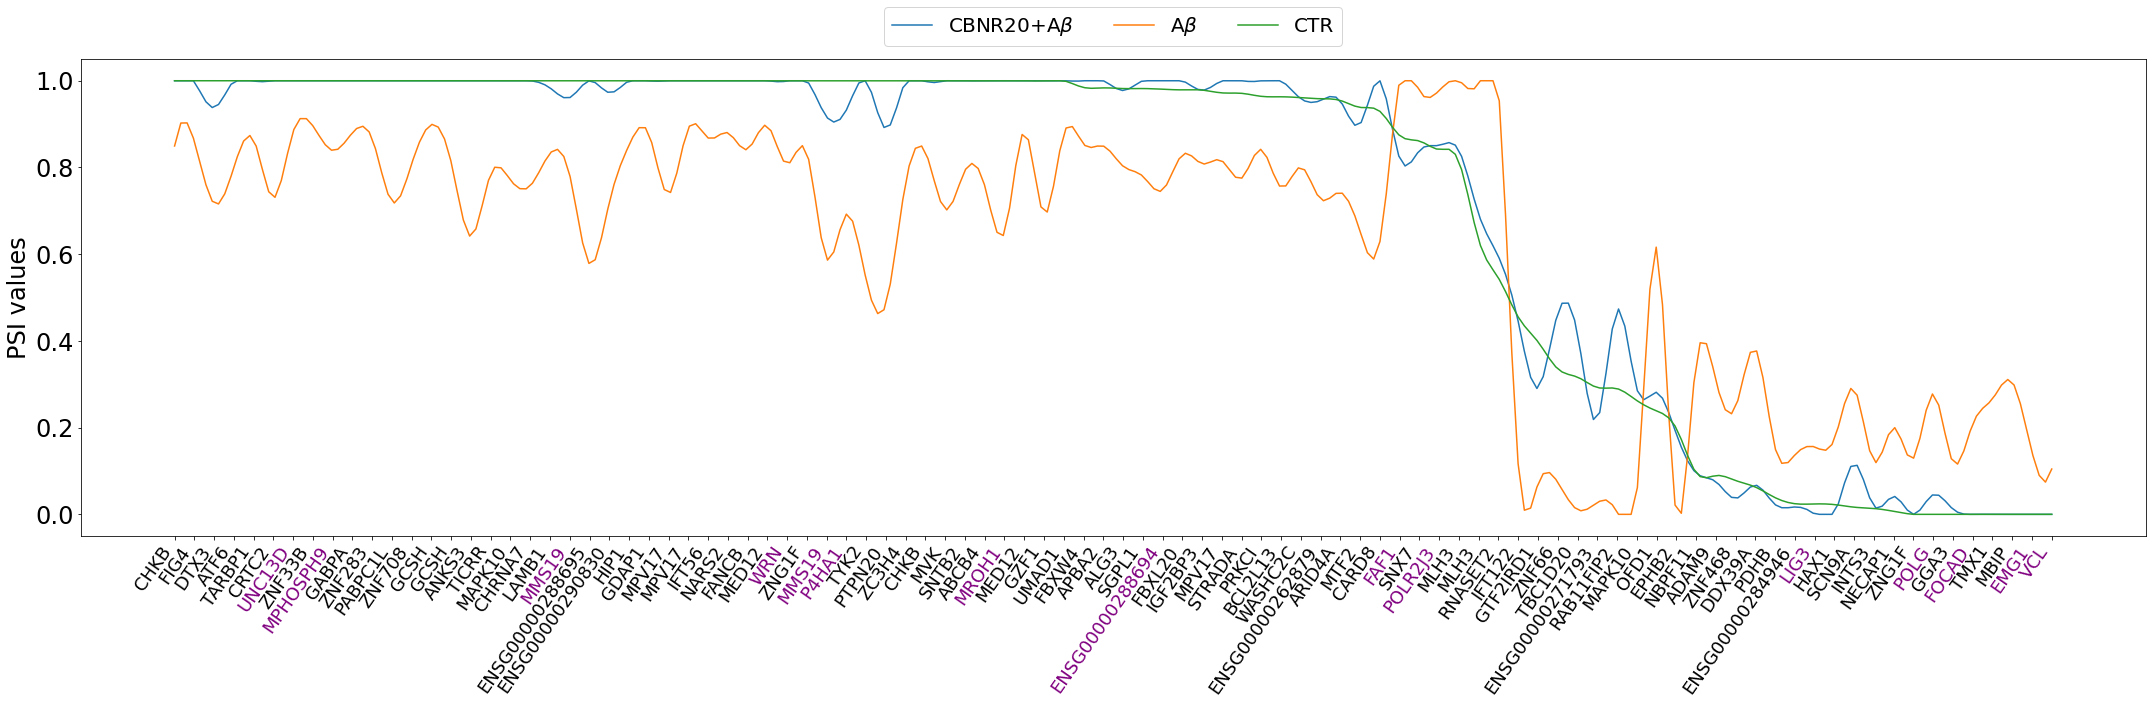

In [37]:
import matplotlib.pyplot as plt

# Define x values and gene labels
x = np.arange(len(shared_single_psi))
gene_labels = shared_single_psi.index

# Smooth each curve with clamping
def smooth_curve(y):
    xnew = np.linspace(x.min(), x.max(), 300)  # More points for smoother curve
    spl = make_interp_spline(x, y, k=3)  # Cubic spline interpolation
    ynew = spl(xnew)
    # Clamp the values to be within [0, 1]
    ynew = np.clip(ynew, 0, 1)
    return xnew, ynew

# Increase the distance between x-ticks by multiplying x by a factor
factor = 10  # Adjust this factor to increase spacing between ticks
x_stretched = x * factor  # Spread the x-tick labels

# Create a plot with adjusted figure size
plt.figure(figsize=(30, 10))  # Adjusted size for more space

D = {'bAmy': 'A' + r'$\beta$', 'CTR': 'CTR', 'CBNR20-bAmy': 'CBNR20+' + 'A' + r'$\beta$'}

# Plot each curve with smoothing, using the stretched x-values
for column in ['CBNR20-bAmy', 'bAmy', 'CTR']:
    xnew, ynew = smooth_curve(shared_single_psi[column])
    plt.plot(xnew * factor, ynew, label=D[column])  # Apply the factor to stretch the smoothed curve

# Add labels and title
plt.ylabel('PSI values', fontsize=24)  # Adjusted y-label font size

# Set the x-tick labels with the stretched x-values
plt.xticks(ticks=x_stretched, labels=gene_labels, rotation=55, ha='right', fontsize=18)

# Get the current axis
ax = plt.gca()

# Now get the x-tick labels and apply the color logic based on gene_dict
xtick_labels = [tick.get_text() for tick in ax.get_xticklabels()]  # Get the x-tick labels
colors = ['purple' if gene_dict.get(gene, False) else 'black' for gene in xtick_labels]  # Color based on dict

# Apply the colors to the x-tick labels
for tick, color in zip(ax.get_xticklabels(), colors):
    tick.set_color(color)

plt.tick_params(axis='y', labelsize=24)  # Adjust y-tick labels font size

# Set legend with increased font size and positioned outside plot at upper center
plt.legend(fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3)

# Hide the x-axis label ('Gene Symbol')
plt.xlabel('')

# Adjust layout to prevent clipping and save the figure
plt.tight_layout()  # Adjust layout
plt.savefig('lineplot.png', dpi=300)  # Save the plot with 300 dpi
plt.show()
